In [1]:
#pip install numpy==1.23.5
# Later versions of numpy caused errors with sklearn

In [2]:
import os
import pandas as pd
import numpy as np
import sys
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import tensorflow as tf
import warnings


 Descriptive statistics

In [3]:
#1- Read the data file into a pandas data frame and print the first 5 rows
df = pd.read_csv('diabetes.csv')
df

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1


In [4]:
#2- Print the number of rows and columns
print(pd.read_csv('diabetes.csv').shape)

# There are 789 rows and 9 columns.

(788, 9)


In [5]:
#3- Calculate the min, max, mean, and std of the ‘age’ column using pandas.
avg_age = df['Age'].agg(['min', 'max', 'mean', 'std'])
print(avg_age)

min     12.000000
max     81.000000
mean    33.215736
std     11.819875
Name: Age, dtype: float64


In [6]:
#4- What is the mode of the ‘age’ column? Comment on the data’s modality (i.e., bimodal,
#trimodal, etc.).

print("The mode of the age column is", df['Age'].mode().values[0])

# The data is unimodal as it has a singular reacurring value. 

The mode of the age column is 22


In [7]:
#5- Use pandas to calculate the first quartile (Q1) and the third quartile (Q3) of the ‘age’ column.

print("first quartile = ", df['Age'].quantile(0.25))
print("third quartile = ", df['Age'].quantile(0.75))

first quartile =  24.0
third quartile =  41.0


In [8]:
#6- What is the Interquartile Range of the ‘age’ column?
# IQR is the third quartile minus the first quartile
IQR = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
print(IQR)

17.0


In [9]:
#7- Print the five-number summary of the ‘age’ column.
print(df['Age'].describe(percentiles=[0.25, 0.5, 0.75])[['min','max', '25%', '50%', '75%']])

min    12.0
max    81.0
25%    24.0
50%    29.0
75%    41.0
Name: Age, dtype: float64


 Data visualisation

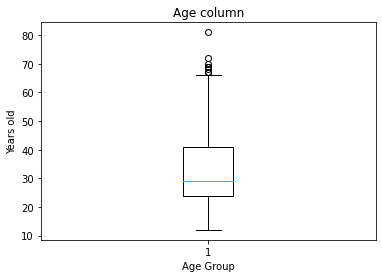

In [10]:
#1- Show a boxplot of the ‘age’ column.
plt.boxplot(df['Age']),
plt.title('Age column'),
plt.xlabel('Age Group'),
plt.ylabel('Years old'),
plt.show()

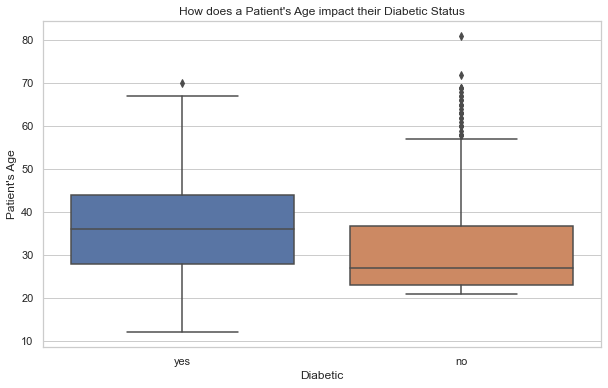

In [11]:
#2- Show a boxplot of the ‘age’ column of the diabetic and no-diabetic groups side by side. The x-
#axis’s label should be (diabetic) and ‘yes’ under positive patients and ‘no’ under negative
#patients, and the y-axis’s label should be (patient’s age), as follows:

# Firstly the ints 1 and 0 representing Yes and No are mapped to the words they represent. 
# Then a boxplot is created using seaborn.

df['Outcome'] = df['Outcome'].map({1: 'yes', 0: 'no'})
sns.set(style="whitegrid"), plt.figure(figsize=(10, 6)), sns.boxplot(x='Outcome', y='Age', data=df)

# Labels are set according to the sample grah provided. 
plt.title("How does a Patient's Age impact their Diabetic Status")
plt.xlabel('Diabetic'), plt.ylabel("Patient's Age")
plt.show()



3- Based on the boxplot of question 2, analyse the relationship between the patient’s age and being diabetic

Based on the boxplot there is a higher probability of contracting diabetes the older a persons age is. Theese boxplots highlight the importance of age in diabetes. There is a dividing line at roughly 35 years of age after which people appear to be more prone to contracting diabetes. Though this is only a contributing factor, middle aged and elderly people are visibly more prone to contracting diabetes.  


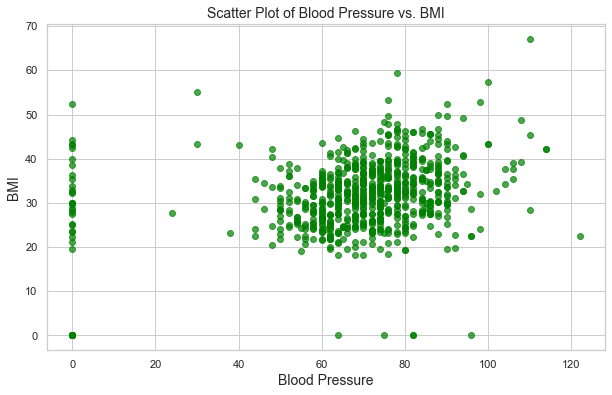

In [12]:
#4- Show a scatter plot with the patient’s Blood pressure on the x-axis and the patient’s BMI on
#the y-axis

blood_pressure = df['BloodPressure']
bmi = df['BMI']

# Scatter plot is created showing the patients Blood pressure and BMI.
plt.figure(figsize=(10, 6)), plt.scatter(blood_pressure, bmi, c='green', alpha=0.7)
plt.xlabel("Blood Pressure", fontsize=14), plt.ylabel("BMI", fontsize=14), plt.title("Scatter Plot of Blood Pressure vs. BMI", fontsize=14)
plt.grid(True)
plt.show()

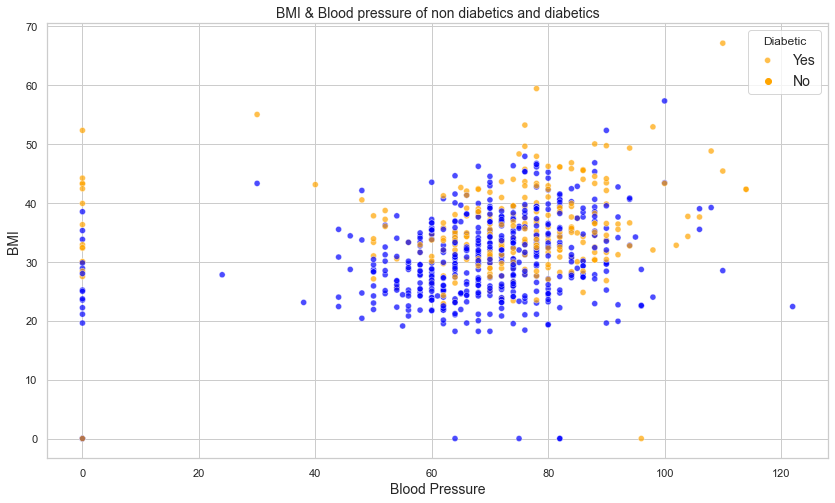

In [13]:
# Show a scatter plot with the patient’s Blood pressure on the x-axis and the patient’s BMI on
#the y-axis, highlighting diabetic patients with different colours. The colouring label should be
#‘diabetic’: yes and no. Illustrative example

# Scatterplot is created using BMI, BloodPressure and Outcome columns, colours are added. 
plt.figure(figsize=(14, 8))
sns.scatterplot(x='BloodPressure', y='BMI', hue='Outcome', data=df, palette={'no': 'blue', 'yes': 'orange'}, alpha=0.7)

# Scatterplot is labeled and a legend is added. 
plt.title("BMI & Blood pressure of non diabetics and diabetics", fontsize=14)
plt.xlabel("Blood Pressure", fontsize=14), plt.ylabel("BMI", fontsize=14)
plt.legend(title='Diabetic', labels=['Yes', 'No'], fontsize=14)
plt.grid(True)
plt.show()

6- Based on the scatterplot of question 5, analyse the relationship between BMI/Blood pressure
and diabetes.

Based on the scatterplot there is a noticeable increase in patients who have diabetes and a bloof pressure over 60. The majority of patients who have diabetes have a blood pressure between 60 and 100. The majority of diabetes patients also have a BMI over 30. That being said there is consiberable number of patients who are not diabetic with BMI's above 30 and blood pressure over 60, so while a patients BMI's and Blood pressure are a factor/potential indicator of diabetes there are clearly other components and factors that have not been mapped on this graph. 


In [14]:
#Select all patients with Insulin more than 400. How many patients are diabetic/no-diabetic
#among those selected?

#Get the total number of patients with insulin levels over 400, use the outcome column to match these patients with diabetes. 
all_patients = df['Insulin'].gt(400)
counts = df.loc[all_patients, 'Outcome'].value_counts()
print(f"Total number of patients with over 400 Insulin = {all_patients.sum()}")
print(f"Diabetic patients with over 400 insulin  = {counts.get('yes', 0)}")
print(f"Non-diabetic patients with over 400 insulin = {counts.get('no', 0)}")

# Answers are 20, 12 and 8.

Total number of patients with over 400 Insulin = 20
Diabetic patients with over 400 insulin  = 12
Non-diabetic patients with over 400 insulin = 8


In [15]:
#2- Select all patients with Insulin greater than 400 and Glucose greater than 175. How many
#patients are diabetic/no-diabetic among those selected?

twofactors_p = df[(df['Insulin'] > 400) & (df['Glucose'] > 175)]
counts = twofactors_p['Outcome'].value_counts()
print(f"Total patients with Insulin over 400 & Glucose over 175 = {len(twofactors_p)}")
print(f"Diabetic patients with insulin over 400 & Glucose over 175 = {counts.get('yes', 0)}")
print(f"Non-diabetic patients with insulin over 400 & Glucose over 175 = {counts.get('no', 0)}")



Total patients with Insulin over 400 & Glucose over 175 = 6
Diabetic patients with insulin over 400 & Glucose over 175 = 5
Non-diabetic patients with insulin over 400 & Glucose over 175 = 1


In [16]:
#3- What is the average Glucose level of a patient with more than 5 pregnancies and older than
#45?

avg_glucose = df[(df['Pregnancies'] > 5) & (df['Age'] > 45)]['Glucose'].mean()
print(f"The average Glucose level for patients who are older then 45 and have had more then 5 pregnancies is: {avg_glucose:.2f}")



The average Glucose level for patients who are older then 45 and have had more then 5 pregnancies is: 135.37


In [17]:
#4- Count the distinct values in the ‘pregnancies’ column.
#Use .nuique to get the distinct values in the column, print the values
distinct_v = df['Pregnancies'].nunique()
print("Distinct values in the 'Pregnancies' column:", distinct_v)


Distinct values in the 'Pregnancies' column: 17


In [18]:
#Data frame created for outcome and pregnancies. 
ans = pd.DataFrame(columns=['Pregnancies', 'Outcome'])

#Iterate through values and sort in ascending order. 
for value in sorted(df['Pregnancies'].unique()):
    subset = df[df['Pregnancies'] == value]
    total_c = len(subset)
    diabetic_r = len(subset[subset['Outcome'] == 'yes'])
    ndiabetic_r = len(subset[subset['Outcome'] == 'no'])
# Get percentage of diabetic and non diabetic people.
    ndiabetic_per = (ndiabetic_r / total_c) * 100
    diabetic_per = (diabetic_r / total_c) * 100
    ans = ans.append({'Pregnancies': value, 'Outcome': f'0: {ndiabetic_per:.2f}%, 1: {diabetic_per:.2f}%'}, ignore_index=True)
#Print results as a table with a header but without an index. 
print(ans.to_string(index=False, header=True))


Pregnancies               Outcome
          0  0: 66.07%, 1: 33.93%
          1  0: 77.30%, 1: 22.70%
          2  0: 82.41%, 1: 17.59%
          3  0: 64.47%, 1: 35.53%
          4  0: 66.67%, 1: 33.33%
          5  0: 63.79%, 1: 36.21%
          6  0: 68.00%, 1: 32.00%
          7  0: 43.48%, 1: 56.52%
          8  0: 45.00%, 1: 55.00%
          9  0: 34.48%, 1: 65.52%
         10  0: 58.33%, 1: 41.67%
         11  0: 36.36%, 1: 63.64%
         12  0: 55.56%, 1: 44.44%
         13  0: 45.45%, 1: 54.55%
         14  0: 0.00%, 1: 100.00%
         15  0: 0.00%, 1: 100.00%
         17  0: 0.00%, 1: 100.00%


In [19]:
#Question 2: Data Cleaning I) Duplicated removal
#Identify any duplicated records by printing “True” if the row is duplicated and “False” otherwise.
duplicates = df.duplicated()
print(duplicates)


0      False
1      False
2      False
3      False
4      False
       ...  
783     True
784     True
785     True
786     True
787     True
Length: 788, dtype: bool


In [20]:
#2. For all duplicated records, keep one record and remove its duplicates.
df = df.drop_duplicates()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,yes
1,1,85,66.0,29,0,26.6,0.351,31,no
2,8,183,64.0,0,0,23.3,0.672,32,yes
3,1,89,66.0,23,94,28.1,0.167,21,no
4,0,137,40.0,35,168,43.1,2.288,15,yes
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180,32.9,0.171,63,no
764,2,122,70.0,27,0,36.8,0.340,27,no
765,5,121,72.0,23,112,26.2,0.245,30,no
766,1,126,60.0,0,0,30.1,0.349,47,yes


In [21]:
#3. What is the dimension of the data frame after removing the duplicates?
print(df.shape)


(768, 9)


#4. How many duplicated rows were there (before removing the duplicates)?

There were 20 duplicate rows in the dataframe before removing them.

In [22]:
#II) Missing values
#1- How many missing values are in the “blood pressure” column?
#Get the sum of the null values in the column.
missing_blood_pressure = df['BloodPressure'].isnull().sum()
print(f"Missing values from the blood pressure column: {missing_blood_pressure}")


Missing values from the blood pressure column: 23


In [23]:
#2- Remove the missing records in the “blood pressure” column. Use the clean dataframe
#(without missing values in ‘blood pressure’ column) for the rest of the questions Q-II-3 to Q-
#II-7

clean_df = df.dropna(subset=['BloodPressure'])


In [24]:
#Q3. Copy the following columns into a separate data frame: 'Pregnancies', 'Glucose',
#'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'

selected_columns = clean_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]


In [25]:
#On the newly copied data from (3). Use sklearn’s train_test_split function to split the data into
#90% training set and 10% testing set

# Add in the selected columns and split into a training and testing set. 
X = selected_columns
X_train, X_test = train_test_split(X, test_size=0.10, random_state=42)



In [30]:
#5- Keep a separate copy of the testing set (evaluation copy) for evaluation in the following
#questions (6-9). In the original testing set, set all the Glucose to null.

# Copy is created for evaluation. All glucose values are set to none with the training set. Stop warnings that occur due to this.
eval_copy = X_test.copy(deep=True)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test['Glucose'] = None



In [27]:
#6- Fill in the missing values of the test set based on the mean of the Glucose of the training set
#(90%). Calculate the RMSEs for the imputed values of the test set (compared to the evaluation
#copy you have saved from (5)).

# Get the mean for glucose and replace values in the test set. 
glucose_mean = X_train['Glucose'].mean()
X_test_imputed = X_test.copy()
X_test_imputed['Glucose'].fillna(glucose_mean, inplace=True)

# Get RMSE for values, print results.
RMSE = np.sqrt(mean_squared_error(eval_copy['Glucose'], X_test_imputed['Glucose']))
print(f"RMSE for the inputed values of the test set is: {RMSE:.2f}")


RMSE for the inputed values of the test set is: 34.09


In [28]:
#7- Fill in the missing values of the testing set based on the median of the Glucose of the training
#set (90%). Calculate the RMSEs for the imputed values of the test set (compared to the
#evaluation copy you have saved from (5)).




In [29]:
#8- Use scikit-learn SimpleImputer with the 'most_frequent' strategy to impute the value of
#glucose in the testing set, and calculate RMSE for the imputed values of the test set (compared
#to the evaluation copy you have saved from (5)).
